# Spambase
Group 7 - Project Proposal
- Evan Armstrong
- Rapeewit Chanprakaisi #57529208
- Riyan Qureshi
- Kathryn Wu

## Introduction

Spam email and text have been a rapidly growing problem since the 1990s. Spam email is unsolicited bulk email, with content varying from explicit to commercial, sometimes containing embedded attachments that activate once the email is read (Cranor et al., 1998, p.74). Bulk email is inexpensive and easy to send, but costly to receive. Spam can burden email service providers, as well as waste the recipient's time and energy on sorting out legitimate communications. While spam mail was noted to be declining as of 2013, it has grown more sophisticated, with spammers using more complex tactics to disguise their messages from filters (Irani et al., 2013, p.2).

The Spambase dataset is a "bag of words"-style collection of word frequencies from spam and non-spam emails from assorted work and personal emails. Its variables of interest include the frequencies of various words, measures of the length of uninterrupted capital letter sequences, and the email's classification as spam or non-spam, represented as 1 and 0, respectively. The words chosen are not all the words that appeared in the original emails, but rather a subset of plausibly spam-related buzzwords, such as "technology", or items that spammers might want to solicit from a recipient, such as "address" or "money".

As spam gets increasingly complex, especially with the recent rise of generative AI (CITATION HERE, MAYBE), humans may once again need to manually discern what in their inbox is spam and is not spam. To supply intuition with data, we will estimate the value of an informative population parameter. Malicious spam often tries to create a false sense of urgency or grab viewer’s attention. Therefore we will start off simple and focus on the location and scale of one parameter, the average length of uninterrupted sequences of capital letters. 
The question we set out to answer in this report is:
### "Is the mean and standard deviation of the average length of uninterrupted sequences of capital letters different for spam vs non-spam email?"
Since we will calculate these values separately for spam and non-spam emails, users will be able to use our analysis to rationally determine if an email is spam, combining this information with their own judgment to produce an accurate classification. For instance, if an email has unusually long sequences of capital letters, then it may be suspicious.

While we fall short of designing a robust decision tree or similar model to automatically detect such emails, we hope that the insights gleaned through this research may provide the basis for users' manual classifications in dealing with suspicious messages.

## Preliminary Results

In our exploratory data analysis, we will first load the dataset. Tidying it does not require much work; the data is already "one observation per row; one variable per column".

In [39]:
# install.packages("gridExtra") # useful in later graphing, to prevent taking up screen space

In [80]:
library(tidyverse)
library(repr)
library(datateachr) # do we really need this? This is the ubc educational package
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(ggplot2)

Here, we read the dataset from the web into R using the function read.csv(). We also give names to the columns and convert the binary 0 and 1 to non-spam and spam. 

In [67]:
spambase <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-201-project/main/spambase/spambase.data")

In [68]:
colnames(spambase) <- c("word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
                        "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
                        "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                        "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
                        "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                        "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
                        "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                        "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
                        "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project", "word_freq_re",
                        "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
                        "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                        "capital_run_length_longest","capital_run_length_total","class")

In [69]:
spambase <- 
    spambase %>% 
    mutate(class = ifelse(class == 1, "spam", "non-spam"))

In [70]:
nrow(spambase)
head(spambase)

[1] 4600

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,⋯,0.00,0.054,0,0.164,0.054,0.000,1.671,4,112,spam


Next, we compute point estimates for the the mean and standard deviation of average run length of capital letters, our parameters of interest.

In [71]:
# Considering that the dataset is a sample from the larger population of spam email,
# computing the mean and standard deviation of the word frequencies for each class produces our point estimates
# We select the columns we need (class and capital_run_length_average)

spambase_selected <- spambase %>%
    select(capital_run_length_average,class) 

spambase_stats <- spambase_selected %>%
    group_by(class) %>%
    summarize(mean_capital_run_length_average = mean(capital_run_length_average),
              sd_capital_run_length_average = sd(capital_run_length_average))
head(spambase_stats)

class,mean_capital_run_length_average,sd_capital_run_length_average
<chr>,<dbl>,<dbl>
non-spam,2.377301,5.113685
spam,9.522345,49.859762


We can see that spam email (in the sample that our dataset represents) has a greater mean and standard deviation than non-spam email. We cannot yet conclude anything from this definitively in our exploratory analysis, as these are just point estimates; but this is a promising start.

### This table serves as our table of estimates. The plot below includes the means (it's hard to put standard deviation on the plots).

We now proceed to graph a boxplot of the sample distribution (this phrasing treats the dataset, a "population", as a sample from the total population of spam email, whose parameters we are estimating).

Warning message:
“Removed 189 rows containing non-finite values (`stat_boxplot()`).”


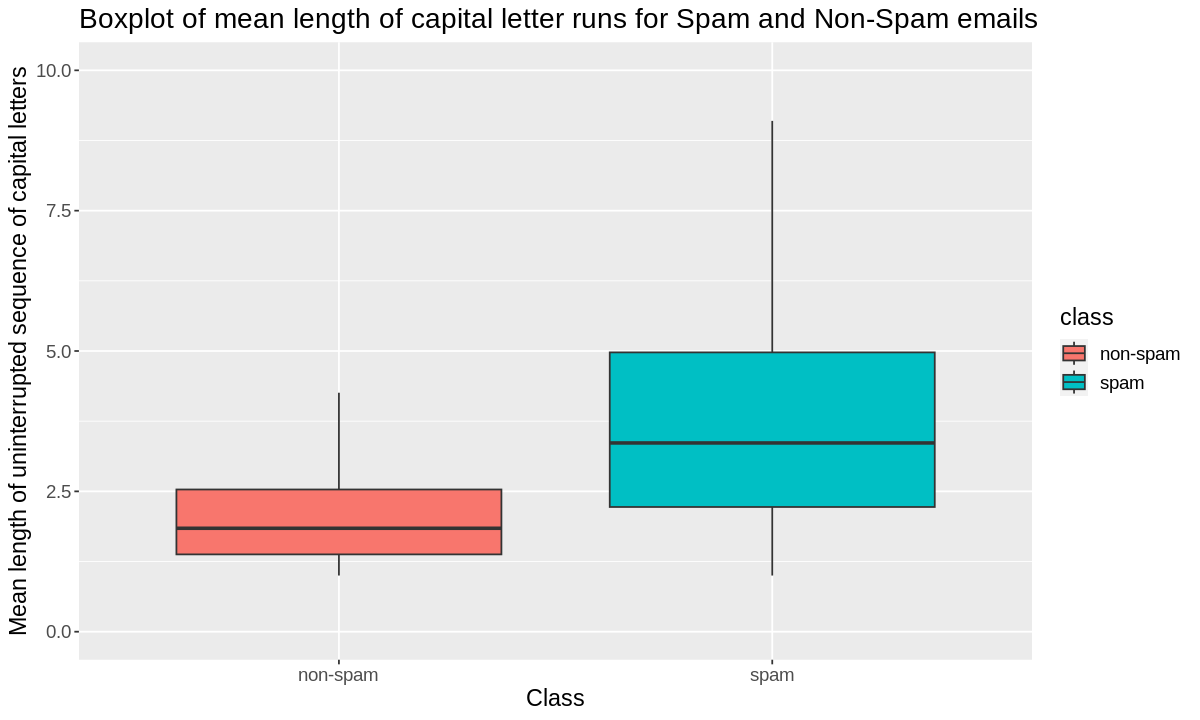

In [93]:
# Graph the distribution of variable of interest for each class, with vertical lines indicating the means of each class
options(repr.plot.width = 10, repr.plot.height = 6)

spam_histogram <- spambase_selected %>% 
    ggplot() +
    geom_boxplot(aes(class, capital_run_length_average, fill = class), outlier.shape = NA) +
    scale_y_continuous(limits = c(0, 10)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Boxplot of mean length of capital letter runs for Spam and Non-Spam emails") + 
    xlab("Class") + 
    ylab("Mean length of uninterrupted sequence of capital letters")
spam_histogram

In [21]:
# Define a function for plotting the kind of histogram we want, to save time and allow for more rapid iteration
plot_spam_histogram <- function(colname) {
    freq_colname <- paste0("word_freq_",colname)
    mean_colname <- paste0("mean_",colname)
    variable_histogram <- ggplot(spambase_selected |> filter(class=="spam"), aes_string(x = freq_colname)) +
        geom_histogram(binwidth=1, fill="steelblue", color="steelblue") +
        geom_vline(xintercept = filter(spambase_stats,class=="spam")[[mean_colname]], color="purple", linetype="longdash") +
        annotate("text", label="Mean freq.", x=filter(spambase_stats,class=="spam")[[mean_colname]] + 0.75, angle=-90, y=700, color="seagreen", size=2) + # this line is adapted from https://www.statology.org/geom_vline-label/ NEED CITATION
        ggtitle(paste0("Distribution of Word Frequencies for \"", colname, "\" in Spam Mail")) +
        xlab(paste0("Word Frequency of \"", colname, "\" in an Email")) +
        scale_y_sqrt() + # square root transformation thought of GPT-4
        ylab("Counts (square root)") +
        theme(plot.title = element_text(size=8),
              axis.title.x = element_text(size=8),
              axis.title.y = element_text(size=8))
    return(variable_histogram)
}

plot_non_spam_histogram <- function(colname) {
    freq_colname <- paste0("word_freq_",colname)
    mean_colname <- paste0("mean_",colname)
    variable_histogram <- ggplot(spambase_selected |> filter(class=="non-spam"), aes_string(x = freq_colname)) +
        geom_histogram(binwidth=1, fill="steelblue", color="steelblue") +
        geom_vline(xintercept = filter(spambase_stats,class=="non-spam")[[mean_colname]], color="purple", linetype="longdash") +
        annotate("text", label="Mean freq.", x=filter(spambase_stats,class=="non-spam")[[mean_colname]] + 0.75, angle=-90, y=700, color="seagreen", size=2) + # this line is adapted from https://www.statology.org/geom_vline-label/ NEED CITATION
        ggtitle(paste0("Distribution of Word Frequencies for \"", colname, "\" in Non-Spam Mail")) +
        xlab(paste0("Word Frequency of \"", colname, "\" in an Email")) +
        scale_y_sqrt() + # square root transformation thought of GPT-4
        ylab("Counts (square root)") +
        theme(plot.title = element_text(size=8),
              axis.title.x = element_text(size=8),
              axis.title.y = element_text(size=8))
    return(variable_histogram)
}

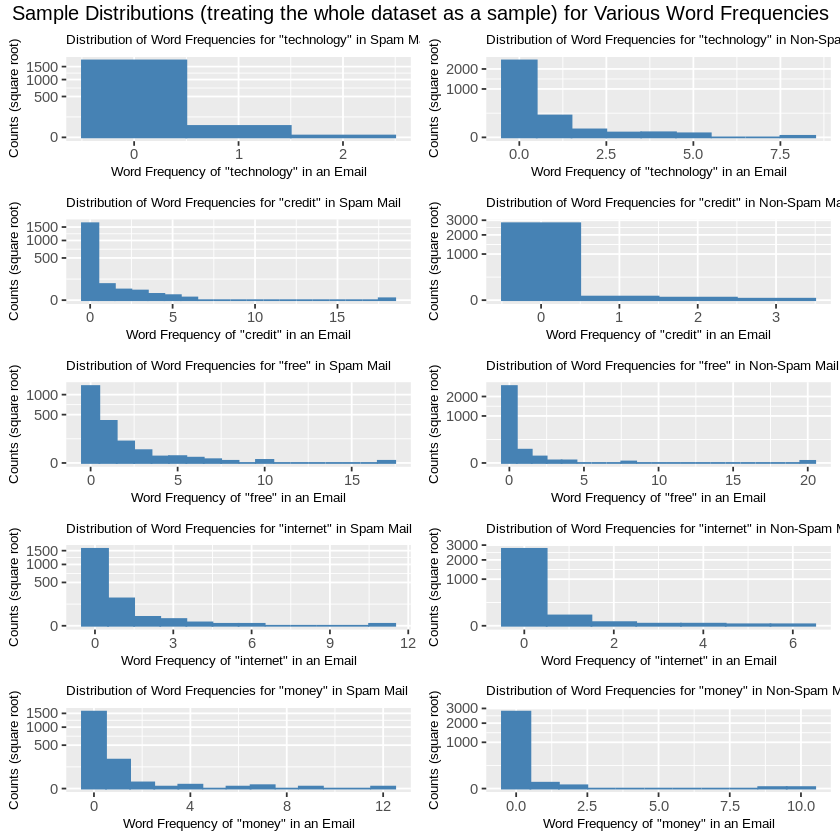

In [22]:
# Graph each of the variables of interest, with vertical lines indicating the means of each class


# spambase_money_spam <- filter(spambase_selected, spam=="spam") |> select(money)
# money_histogram <- ggplot(spambase_money_spam, aes(x = word_freq_money)) +
#     geom_histogram(binwidth=0.33, fill="black", color="white") +
#     geom_vline(x_intercept = spambase_stats$mean_money, color="red", linetype="longdash") +
#     annotate("mean word frequency", x=spambase_stats$mean_money - 0.5, angle=90, y=20, color="blue") + # this line is adapted from https://www.statology.org/geom_vline-label/ NEED CITATION
#     ggtitle("Distribution of Word Frequencies for the Word \"money\" in Spam Mail (plotted with the mean indicated)") +
#     xlab("Word Frequency of \"money\" in an Email")


p1_s <- plot_spam_histogram("technology")
p1_ns <- plot_non_spam_histogram("technology")

p2_s <- plot_spam_histogram("credit")
p2_ns <- plot_non_spam_histogram("credit")

p3_s <- plot_spam_histogram("free")
p3_ns <- plot_non_spam_histogram("free")

p4_s <- plot_spam_histogram("internet")
p4_ns <- plot_non_spam_histogram("internet")

p5_s <- plot_spam_histogram("money")
p5_ns <- plot_non_spam_histogram("money")

grid.arrange(p1_s,p1_ns,p2_s,p2_ns,p3_s,p3_ns,p4_s,p4_ns,p5_s,p5_ns, ncol=2, top="Sample Distributions (treating the whole dataset as a sample) for Various Word Frequencies") # CITATION github copilot for automating the painful grid.arrange process. GPT-4 suggested using it (didn't want to use facet wrap, not familiar enough with that).

## Relevance of plot
In the above plot, we graphed the distribution of word frequencies across spam and non-spam emails, to get a sense of their distributions, values, and how they compare to the mean. Since 0 was by far the most common value for each word frequency (to the point where the other values were often not visible), we used a square-root y-axis to make the differences in distribution more clear. This means that slight differences at higher y values indicate dramatic differences in the commonness of that word frequency.

In every case, the distribution of word frequencies resembles an inverse exponential function. Notably, the mean word frequency for most words in the non-spam portion of the dataset is near-zero, yet is slightly to the right of zero for most of the spam emails. Interestingly, there is not one variable of interest whose mean word frequency is significantly above 0 in both spam and non-spam emails. 

From these point estimates, we might draw an early assumption that occurrences of words such as "money" "credit", "internet", and sometimes "free", make an email more likely to be spam. This observation already partly addresses our research question, but we ought to do a more thorough analysis: to make any inferences or bold statements, we should at least calculate a confidence interval and test our hypothesis.


## Methods: Plan

The `spambase` dataset is large — it has 4600 rows. Thus it is no small sample, and its point estimates are likely to be more accurate than might often be observed in samples, according to the Law of Large Numbers. Our initial research question seems plausibly addressable by the data we have at our disposal, if the distributions and means we calculated so far in this preliminary analysis are any indication. 

However, our work is not finished here. A point estimate is simply an estimate — it can be wrong. It is just a single number and gives us no idea about what range of values the true population parameter may actually take on, nor does it give us any idea of how likely we are to be wrong, as hypothesis testing might (FACTCHECK ON TERM UNDERSTANDING NEEDED ON THAT LAST BIT. ALSO MAYBE CITATIONS? BUT PROBABLY NOT). To address these gaps, in our final analysis, we will perform bootstrap sampling to provide us with our range of values, ensuring that our conclusions are likely to be "in the ballpark" even if they are not precisely right, and we will do hypothesis testing in order to make an inference about the population from this sample, with a known likelihood of error (FACT CHECK NEEDED). 

#### What do we expect to find?

We fully expect to find that our hypothesis — that the point estimates are roughly accurate — holds, and we anticipate narrow confidence intervals. Besides our (very large) sample already showing clear patterns upon visual inspection, it is also a fact that machine learning algorithms, such as decision trees using XGBoost (CITE: the machine learning repository page we got the dataset from) are able to classify spam emails with over 90% accuracy using this dataset. Clearly, there exist differences in word usage that set spam emails apart. We believe it reasonable to expect that statistically analyzing said word usage data should shed light on these differences. However, it should be noted that our graphs appear more varied than they are, due to the square-root-scaled y-axis used for easier visualization: it could be that this extreme concentration of values at 0, for all word frequencies, makes any patterns difficult to model or draw conclusions from.

#### What impact could such findings have?

In completing this study, we will attain values that estimate word frequency means (and their standard deviations) *while also* knowing how uncertain these values are. This information could prove to be invaluable to individuals looking for quantified information about how to approach unsolicited things in their inbox. This information could also be useful to marketing companies: if they know what words are frequently associated with spam — and on whose frequencies many spam-detection models are trained — then they could design their advertising material to avoid using such words, thus preventing legitimate customer outreach attempts from being thrown in the same pile as scams. However, this information also has a potential for malicious use by scammers, which should be noted (EVAN NOTE: maybe don't use these sentences, the TA might take moral umbrage). On a brighter note, as we outlined in the introduction to this preliminary analysis, spam detection is an incredibly important endeavor — while plenty of models exist to detect spam, human-interpretable data might make it easier for the engineers and managers behind the models to make informed decisions and deliberate improvements.

#### What future questions could this lead to?

Our study is limited in scope to only five keywords. The dataset overall contains many more, and even this is just a subset of the total words used harvested from the original dataset. One immediate question might be what other patterns, means, standard deviations, and other parameters exist for the other keywords; which of these are associated with spam and which are associated with non-spam; and so on. Additionally, all of our selected keywords (at least, judging by their point estimates) are either associated with spam, or with non-spam, but not both. Another question then might be "what keywords are associated with both spam and non-spam emails, if any?" — or, put otherwise, "which keywords are common in all email, but not informationally-useful?" Finally, when it comes to applying this knowledge, we might wonder how the information our analysis uncovers might be used to refine and improve existing spam-detection models — though the precise wording of such a question is difficult to determine ahead of time, before we have the results from anything but our preliminary efforts.

## References

- Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.